<a href="https://colab.research.google.com/github/UmeshikaThathsarani/FuelO/blob/main/DNN_Model_Test_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model-1**

Epoch 1/100
910/910 [==============================] - 2s 2ms/step - loss: 6280416.5000 - mse: 6280416.5000 - val_loss: 597753.9375 - val_mse: 597753.9375
Epoch 2/100
910/910 [==============================] - 2s 2ms/step - loss: 467453.5625 - mse: 467453.5625 - val_loss: 366672.0625 - val_mse: 366672.0625
Epoch 3/100
910/910 [==============================] - 1s 2ms/step - loss: 294568.7500 - mse: 294568.7500 - val_loss: 223823.2500 - val_mse: 223823.2500
Epoch 4/100
910/910 [==============================] - 2s 2ms/step - loss: 174608.8906 - mse: 174608.8906 - val_loss: 130214.8672 - val_mse: 130214.8672
Epoch 5/100
910/910 [==============================] - 2s 2ms/step - loss: 107315.8672 - mse: 107315.8672 - val_loss: 93142.8516 - val_mse: 93142.8516
Epoch 6/100
910/910 [==============================] - 2s 2ms/step - loss: 83997.5312 - mse: 83997.5312 - val_loss: 79538.1953 - val_mse: 79538.1953
Epoch 7/100
910/910 [==============================] - 1s 2ms/step - loss: 73159.4688 

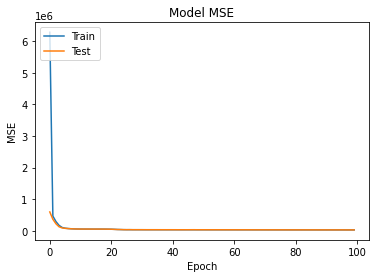

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the automobile dataset
df = pd.read_csv('/content/Normalized_Without_Outputs.csv')

# Select the features and target variables
X = df.iloc[:, :-2]
y = df.iloc[:, -2:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=213, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test mse:', score[1])

# Plot the accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# **Model-2**

Epoch 1/100
182/182 [==============================] - 2s 5ms/step - loss: 23324010.0000 - val_loss: 19095144.0000
Epoch 2/100
182/182 [==============================] - 1s 3ms/step - loss: 5727681.0000 - val_loss: 975513.7500
Epoch 3/100
182/182 [==============================] - 0s 2ms/step - loss: 720403.3750 - val_loss: 537853.4375
Epoch 4/100
182/182 [==============================] - 0s 2ms/step - loss: 428978.7500 - val_loss: 339546.5312
Epoch 5/100
182/182 [==============================] - 0s 2ms/step - loss: 283783.3125 - val_loss: 233918.9688
Epoch 6/100
182/182 [==============================] - 0s 2ms/step - loss: 205913.5312 - val_loss: 175981.9062
Epoch 7/100
182/182 [==============================] - 0s 2ms/step - loss: 161209.0938 - val_loss: 141357.9688
Epoch 8/100
182/182 [==============================] - 0s 2ms/step - loss: 133570.6562 - val_loss: 119298.5859
Epoch 9/100
182/182 [==============================] - 0s 2ms/step - loss: 115060.8438 - val_loss: 104491.6

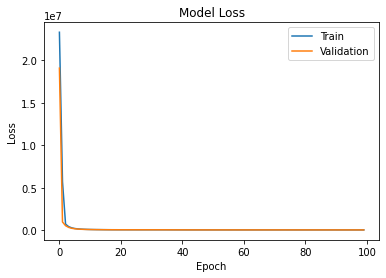

Test set accuracy: 42955.83203125


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv('/content/Correlated - Copy.csv')

# Split dataset into features (X) and targets (y)
X = df.iloc[:, :-2]
y = df.iloc[:, -2:]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Scale features to zero mean and unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2))

# Compile model with Mean Squared Error (MSE) loss function and Adam optimizer
model.compile(loss='mse', optimizer='adam')

# Train model on training data
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

# Evaluate model on test data
score = model.evaluate(X_test, y_test)

# Plot training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Print test set accuracy
print('Test set accuracy:', score)
